In [6]:
!conda install cvxpy -y

Solving environment: done

## Package Plan ##

  environment location: /Users/felipe/anaconda/envs/fenicsproject

  added / updated specs:
    - cvxpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cvxpy-1.1.11               |   py38h50d1736_0          80 KB  conda-forge
    cvxpy-base-1.1.11          |   py38h1588c1c_0         903 KB  conda-forge
    libcxx-11.1.0              |       habf9029_0         1.0 MB  conda-forge
    osqp-0.6.2                 |   py38he9f00de_1         176 KB  conda-forge
    qdldl-python-0.1.5         |   py38he9f00de_0          86 KB  conda-forge
    scs-2.1.2                  |   py38h94b03ca_2         114 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  cvxpy              conda-forge/osx-64::cvxpy-1.1.11-py3

In [92]:
import cvxpy as cvx

In [23]:
import numpy as np
rho = np.array([[1, 0.82, 0.78, 0.1, 0, 0.5, 0], \
                [0.82, 1, 0.85, 0.12, 0.08, 0.63, 0],\
                [0.78, 0.85, 1, 0.05, 0.03, 0.71, 0],\
                [0.1, 0.12, 0.05, 1, 0.65, 0.2, 0],\
                [0, 0.08, 0.03, 0.65, 1, 0.23, 0],\
                [0.5, 0.63, 0.71, 0.2, 0.23, 1, 0],\
                [0, 0, 0, 0, 0, 0, 1]])

In [69]:
sigma = 1/100 * np.array([14.3, 17.4, 21.2, 4.3, 4, 8.4, 0.5])
sigma = sigma.reshape((1,7))
sigma_t = sigma.reshape((7, 1))

In [78]:
cov = rho * (sigma_t.dot(sigma))

In [86]:
mu = np.array([6, 7, 9.5, 1.5, 1.3, 3.2, 0]) * 1/100
mu = mu.reshape((1,7))
mu_t = mu.reshape((7,1))

In [126]:
cov_inv = np.linalg.inv(cov)
lambda_2 = (mu.dot(cov_inv.dot(mu_t)))/(4*2.25/100)
lambda_ = lambda_2[0][0] ** 0.5
w_MVO = cov_inv.dot(mu_t)/(2*lambda_)
w_MVO

array([[ 0.39221455],
       [-0.2075598 ],
       [ 0.45522167],
       [ 1.17736225],
       [ 1.25618998],
       [ 0.03235424],
       [ 0.        ]])

In [127]:
w = cvx.Variable(7)
obj = cvx.Minimize(- mu @ w)
constr = cvx.quad_form(w, cov)
problem = cvx.Problem(obj, [constr <= 2.25/100])
problem.solve()
print(w.value)

[ 0.39221455 -0.20755979  0.45522166  1.17736224  1.25618997  0.03235424
  0.        ]


In [124]:
expected_return = []
risk = []

for cap in range(0, 25):
    w = cvx.Variable(7)
    obj = cvx.Maximize(mu @ w)
    constr = cvx.quad_form(w, cov)
    problem = cvx.Problem(obj, [constr <= cap/100])
    problem.solve()
    solution_value = mu @ w.value

    expected_return.append(solution_value)
    risk.append(cap)

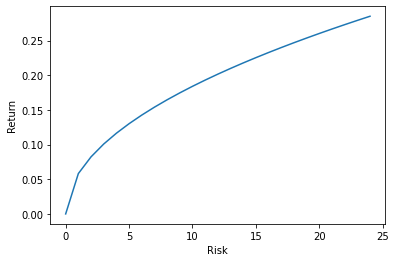

In [125]:
import matplotlib.pyplot as plt
plt.plot(risk, expected_return)
plt.xlabel('Risk')
plt.ylabel('Return')
plt.show()

In [128]:
w = cvx.Variable(7)
obj = cvx.Maximize(mu @ w)
constr = cvx.quad_form(w, cov)
problem = cvx.Problem(obj, [constr <= 2.25/100, w >= 0])
problem.solve()
print(w.value)

[2.90105631e-01 1.56033729e-08 3.76761426e-01 1.17189909e+00
 1.22859880e+00 7.95188645e-06 1.43052146e-03]


In [132]:
w = cvx.Variable(7)
obj = cvx.Maximize(mu @ w)
constr = cvx.quad_form(w, cov)
problem = cvx.Problem(obj, [constr <= 2.25/100, w >= 0, sum(w) == 1])
problem.solve()
print(w.value)

[1.76030523e-01 7.42907892e-08 6.06990694e-01 2.16978556e-01
 1.21083242e-07 2.49217429e-08 7.51110261e-09]


In [133]:
expected_return = []
risk = []

for cap in range(0, 25):
    w = cvx.Variable(7)
    obj = cvx.Maximize(mu @ w)
    constr = cvx.quad_form(w, cov)
    problem = cvx.Problem(obj, [constr <= 2.25/100, w >= 0, sum(w) == 1])
    problem.solve()
    solution_value = mu @ w.value

    expected_return.append(solution_value)
    risk.append(cap)

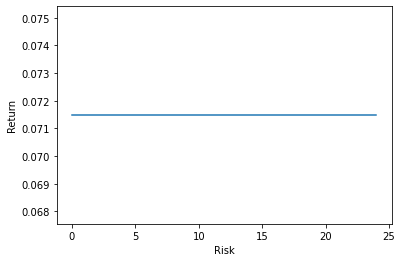

In [134]:
plt.plot(risk, expected_return)
plt.xlabel('Risk')
plt.ylabel('Return')
plt.show()